# Introduction

Exploring the data distribution, deviation and correlation are important steps in a machine learning project. Understanding these characteristics of the data can provide valuable insights into the underlying patterns and relationships within the data. It can also help inform the model selection and feature engineering. Outlier detection is also an important step in this process, as outliers can have a significant impact on the model's performance. Outliers can be detected by analyzing the distribution of data and looking for values that fall far outside of the expected range. Once outliers are detected, it's important to decide if they should be removed or transformed. Data normalization is another important step in data exploration. It is a technique used to scale data so that it has a mean of zero and a standard deviation of one. This can be helpful in some machine learning algorithms, particularly those based on gradient descent. By normalizing the data, you can ensure that all features are on a similar scale, which can lead to faster convergence and better performance.

# 1. Preparation Stage

## 1.A. Importing Data 

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import *
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import clear_output
import seaborn as sns
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('../Data/dataset_clean.csv')
print(df.head(5))

   cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0     99    0.0046   -0.0001     100.0  518.67  642.36  1586.44  1400.16   
1     41    0.0029   -0.0001     100.0  518.67  642.18  1579.04  1400.26   
2     65    0.0043    0.0000     100.0  518.67  642.49  1591.68  1398.09   
3    142   -0.0046   -0.0001     100.0  518.67  643.51  1592.92  1417.52   
4     75    0.0004   -0.0001     100.0  518.67  642.38  1579.38  1399.53   

      s5     s6  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0  14.62  21.61  ...  2388.01  8150.36  8.4079  0.03  391  2388  100.0  39.00   
1  14.62  21.61  ...  2388.06  8132.62  8.4038  0.03  393  2388  100.0  38.96   
2  14.62  21.61  ...  2388.05  8133.78  8.4029  0.03  394  2388  100.0  38.98   
3  14.62  21.61  ...  2388.10  8155.69  8.5048  0.03  394  2388  100.0  38.70   
4  14.62  21.61  ...  2388.00  8141.53  8.4402  0.03  393  2388  100.0  39.07   

       s21  ttf  
0  23.4074  115  
1  23.3017  300  
2 

# 2. Feature Exploration

## 2.A. Feature Distribution

Dropdown(index=4, options=('cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's…

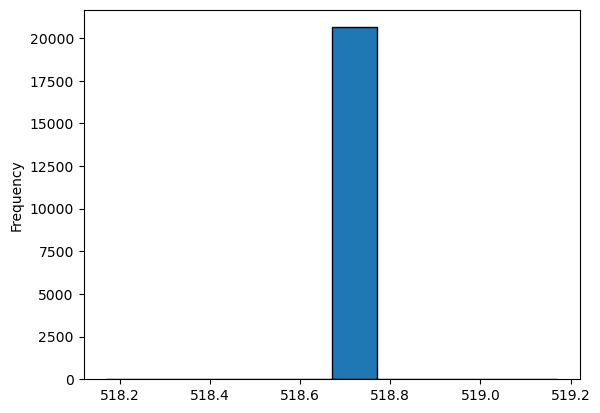

In [21]:
drop_down_distribuition = Dropdown(options = df.columns)
selected_distribuition = drop_down_distribuition.value

def dropdown_distribuition_handler(change):
    selected_distribuition = change.new 
    clear_output(wait=True)
    df[selected_distribuition].plot(kind='hist', edgecolor='black')
    display(drop_down_distribuition)
    
drop_down_distribuition.observe(dropdown_distribuition_handler, names='value')
display(drop_down_distribuition)
df[selected_distribuition].plot(kind='hist', edgecolor='black')

We drop the following sensors and settings since their value is the same throught the whole dataset.

In [4]:
df.drop(['setting3', 's1', 's5', 's10', 's16', 's18', 's19'], axis=1, inplace=True)

## 2.B. Feature Deviation

In [5]:
print(df.std())

cycle       68.880990
setting1     0.002187
setting2     0.000293
s2           0.500053
s3           6.131150
s4           9.000605
s6           0.001389
s7           0.885092
s8           0.070985
s9          22.082880
s11          0.267087
s12          0.737553
s13          0.071919
s14         19.076176
s15          0.037505
s17          1.548763
s20          0.180746
s21          0.108251
ttf         68.880990
dtype: float64


## 2.C. Feature Correlation

Correlate between sensors and settings with ttf. Low correlation sensors and settings should be targeted on feature removal.
Check correlation between the other sensors (create heatmap). Remove one of the sensors for each pair that is highly correlated.


<AxesSubplot:>

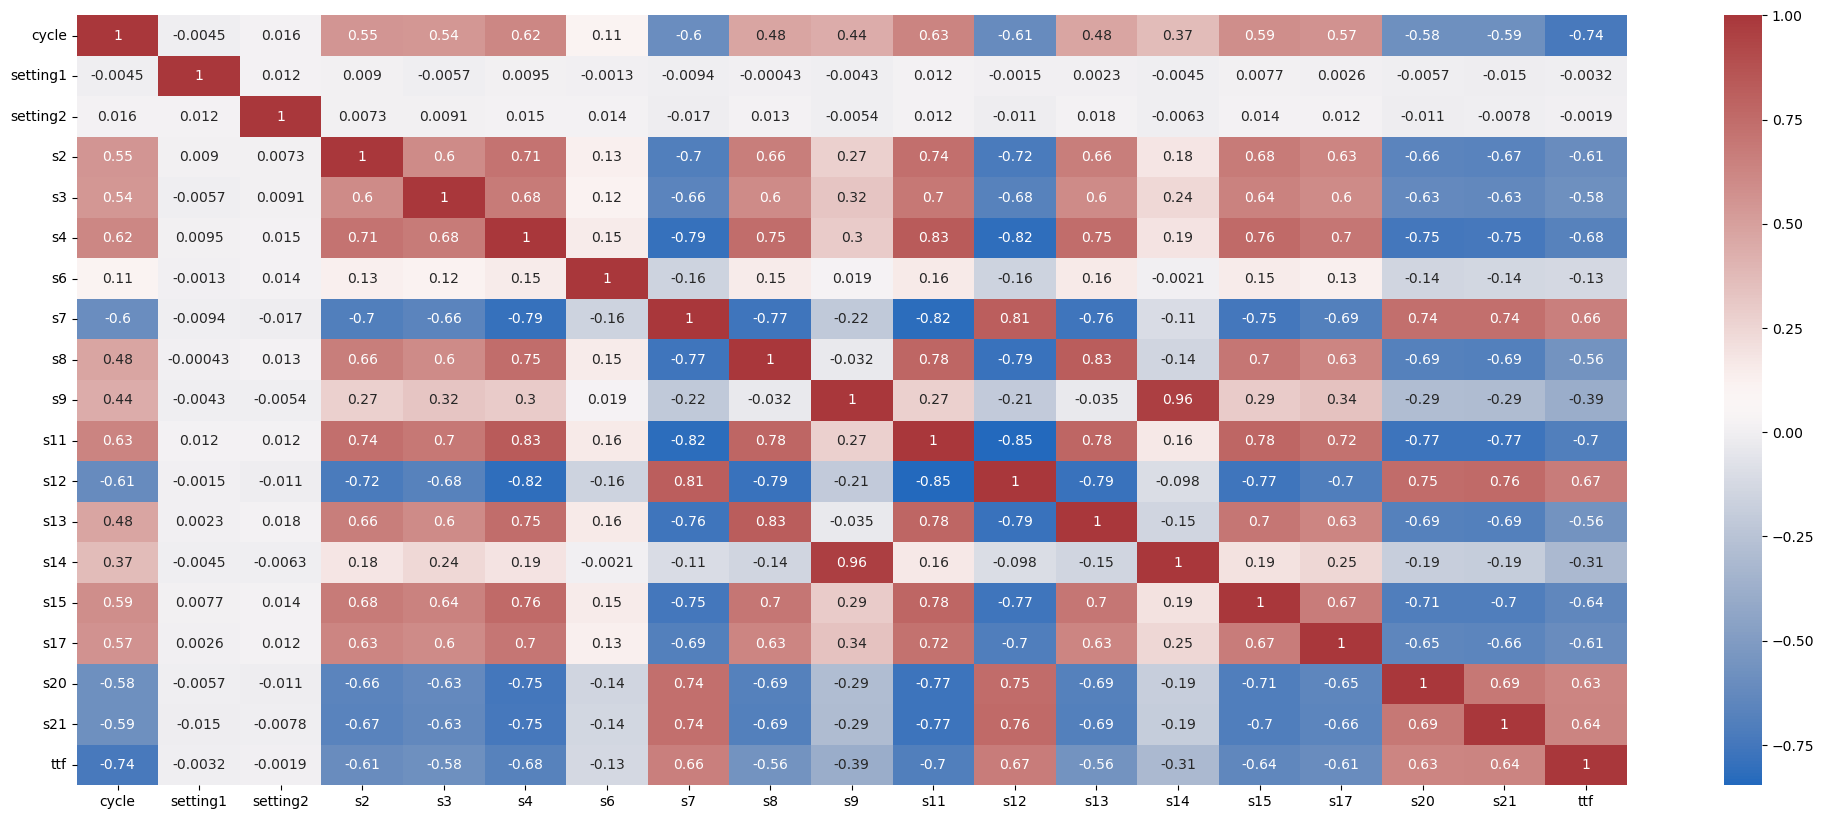

In [6]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.heatmap(df.corr(), ax=ax, annot=True, cmap="vlag")

# 3. Outlier Detection

## 3.A. Boxplot Visualization

<AxesSubplot:>

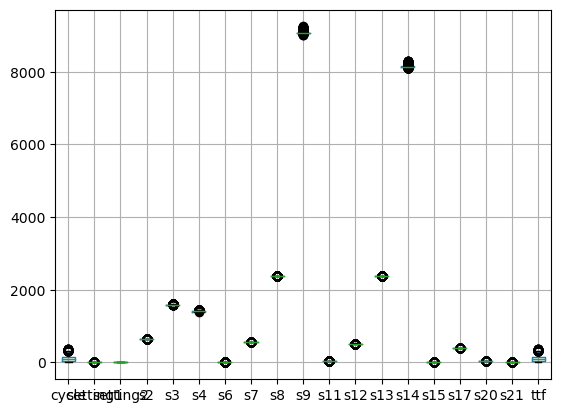

In [7]:
df.boxplot()

As we can see, the data in the previous boxplot is pretty much unreadable.
Let's now normalize the data applying a MinMax scaler and plot again.

<AxesSubplot:>

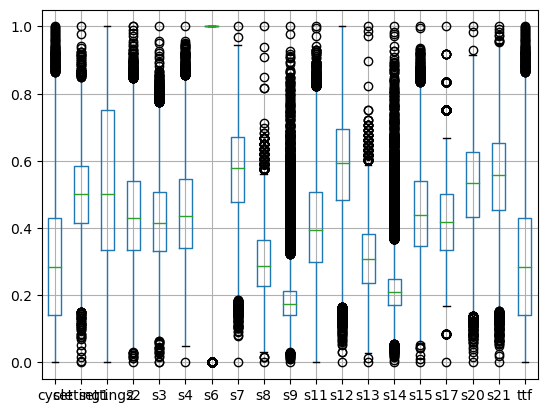

In [8]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled, columns=df.columns)
df_normalized.boxplot()

Much better, to visualize even better let's separate the various columns and add a dropdown to select each.

Dropdown(options=('cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's1…

<AxesSubplot:>

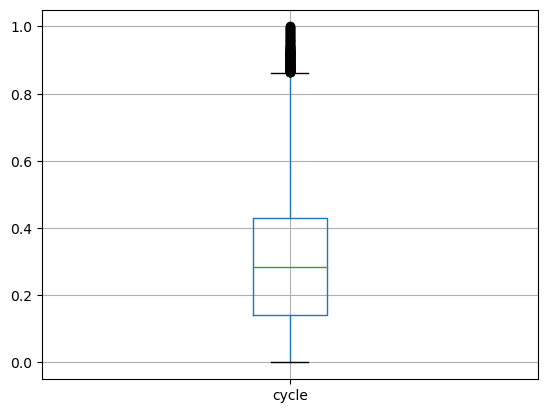

In [9]:
drop_down_boxplot = Dropdown(options = df_normalized.columns)
selected_boxplot = drop_down_boxplot.value

def dropdown_boxplot_handler(change):
    selected_boxplot = change.new 
    clear_output(wait=True)
    df_normalized.boxplot(column=selected_boxplot, return_type='axes')
    display(drop_down_boxplot)
    
drop_down_boxplot.observe(dropdown_boxplot_handler, names='value')
display(drop_down_boxplot)
df_normalized.boxplot(column=selected_boxplot, return_type='axes')

## 3.B Scatterplot visualization

Dropdown(options=('cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's1…

Dropdown(options=('cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's1…

<AxesSubplot:xlabel='cycle', ylabel='cycle'>

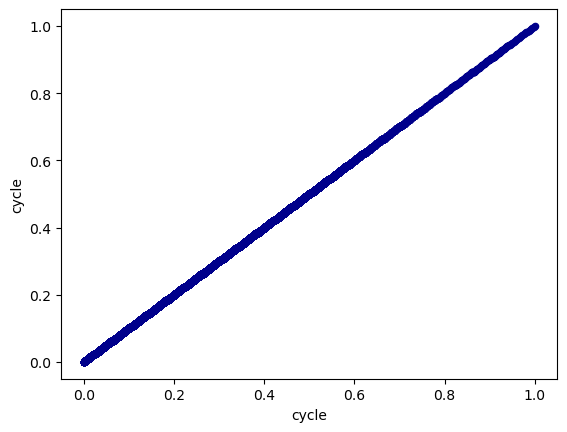

In [10]:
drop_down_scatter_x = Dropdown(options = df.columns)
selected_scatter_x = drop_down_scatter_x.value
drop_down_scatter_y = Dropdown(options = df.columns)
selected_scatter_y = drop_down_scatter_y.value

def dropdown_distribuition_handler_x(change):
    selected_scatter_x = change.new 
    clear_output(wait=True)
    df_normalized.plot.scatter(x=selected_scatter_x, y=selected_scatter_y, c='DarkBlue')
    display(drop_down_scatter_x)
    display(drop_down_scatter_y)
    
def dropdown_distribuition_handler_y(change):
    selected_scatter_y = change.new 
    clear_output(wait=True)
    df_normalized.plot.scatter(x=selected_scatter_x, y=selected_scatter_y, c='DarkBlue')
    display(drop_down_scatter_x)
    display(drop_down_scatter_y)

drop_down_scatter_x.observe(dropdown_distribuition_handler_x, names='value')
display(drop_down_scatter_x)
drop_down_scatter_y.observe(dropdown_distribuition_handler_y, names='value')
display(drop_down_scatter_y)
df_normalized.plot.scatter(x=selected_scatter_x, y=selected_scatter_y, c='DarkBlue')

# 4. Data changes

In [11]:
df_export = pd.read_csv('../Data/dataset_clean.csv')

In [12]:
df_export.drop(['setting3', 's1', 's5', 's10', 's16', 's18', 's19'], axis=1, inplace=True)

## 4.A. Correlated feature removal

In [13]:
df_export.drop(['setting1', 'setting2', 's6'], axis=1, inplace=True)

## 4.B. Outlier removal

In [14]:
df_export.head(5)

,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf
0,99,642.36,1586.44,1400.16,554.29,2387.98,9064.33,47.25,522.47,2388.01,8150.36,8.4079,391,39.00,23.4074,115
1,41,642.18,1579.04,1400.26,553.11,2388.04,9055.54,47.15,522.48,2388.06,8132.62,8.4038,393,38.96,23.3017,300
2,65,642.49,1591.68,1398.09,554.58,2387.98,9054.81,47.12,522.07,2388.05,8133.78,8.4029,394,38.98,23.2972,89
3,142,643.51,1592.92,1417.52,553.06,2388.10,9082.10,47.77,521.39,2388.10,8155.69,8.5048,394,38.70,23.2388,56
4,75,642.38,1579.38,1399.53,553.87,2388.04,9062.25,47.36,521.73,2388.00,8141.53,8.4402,393,39.07,23.3104,78


## 4.C. Data normalization

In [15]:
x = df_export.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_export = pd.DataFrame(x_scaled, columns=df_export.columns)

Dropdown(options=('cycle', 's2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20'…

<AxesSubplot:ylabel='Frequency'>

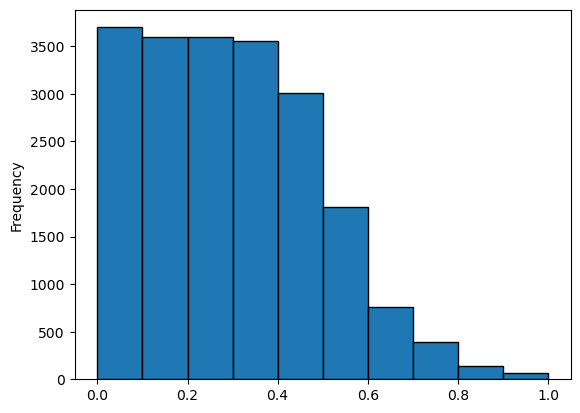

In [16]:
drop_down_distribuition = Dropdown(options = df_export.columns)
selected_distribuition = drop_down_distribuition.value

def dropdown_distribuition_handler(change):
    selected_distribuition = change.new 
    clear_output(wait=True)
    df_export[selected_distribuition].plot(kind='hist', edgecolor='black')
    display(drop_down_distribuition)
    
drop_down_distribuition.observe(dropdown_distribuition_handler, names='value')
display(drop_down_distribuition)
df_export[selected_distribuition].plot(kind='hist', edgecolor='black')

## 4.D. Data splitting

In [17]:
train, test = train_test_split(df_export, test_size=0.2, random_state=42, shuffle=True)

## 4.E. Data exporting

In [18]:
train.to_csv('../Data/train.csv', index=False)
test.to_csv('../Data/test.csv', index=False)